In [1]:
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1591,ham,That's my honeymoon outfit. :),NaN,NaN,NaN
3591,ham,I anything lor...,NaN,NaN,NaN
1479,ham,My trip was ok but quite tiring lor. Uni start...,NaN,NaN,NaN
861,ham,Your brother is a genius,NaN,NaN,NaN
4446,ham,Please tell me you have some of that special s...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
5039,spam,Natalie (20/F) is inviting you to be her frien...
3938,ham,Y Ì_ wan to go there? C doctor?
805,ham,I dled 3d its very imp
27,ham,Did you catch the bus ? Are you frying an egg ...
3206,ham,This phone has the weirdest auto correct.


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
377,ham,Well there's not a lot of things happening in ...
3978,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
1667,ham,So now my dad is gonna call after he gets out ...
3130,spam,LookAtMe!: Thanks for your purchase of a video...
375,ham,Can you say what happen


In [12]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(5169, 2)

## 2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [23]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


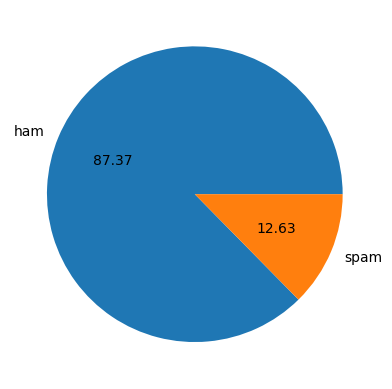

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# Data is imbalanced


In [26]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import nltk

In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aleen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
df['num_characters'] = df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

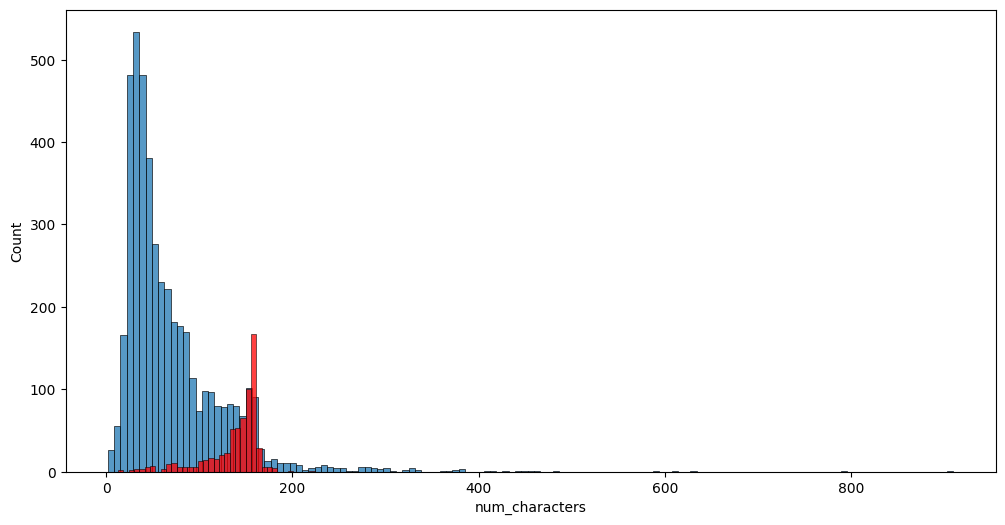

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

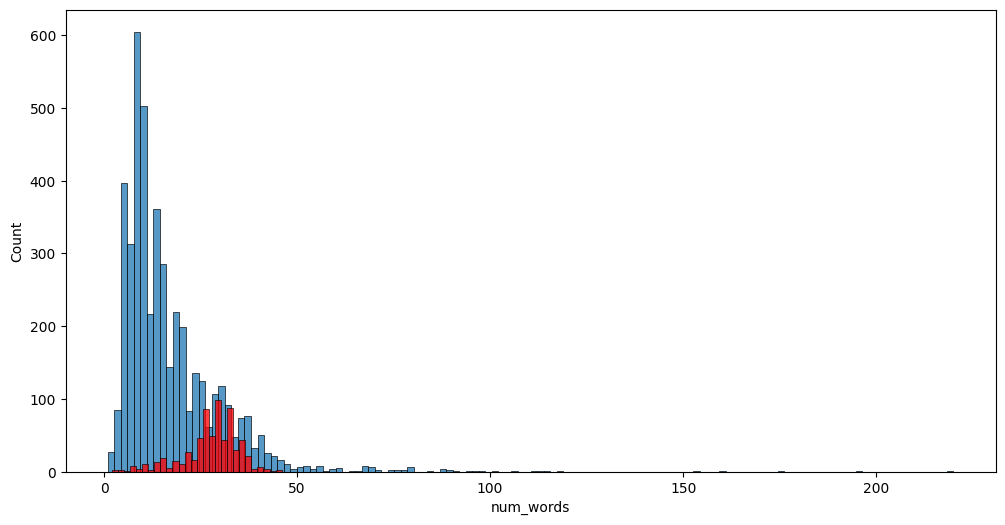

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

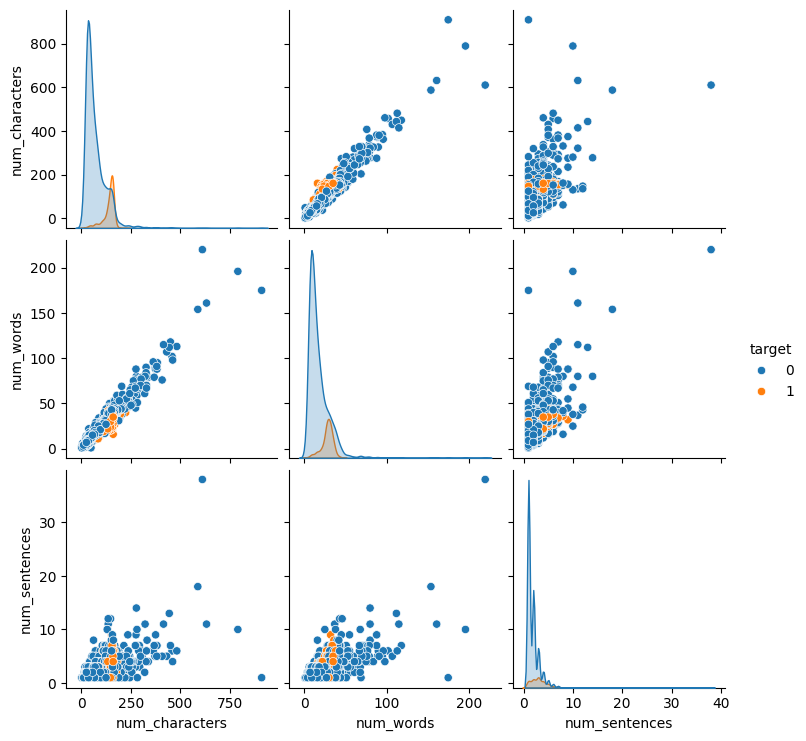

In [42]:
sns.pairplot(df,hue='target')

<Axes: >

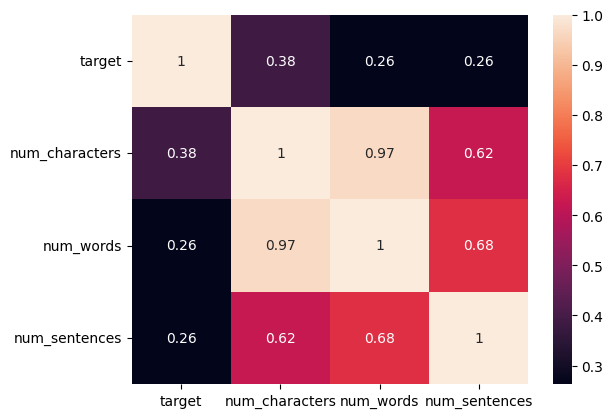

In [43]:
import seaborn as sns
import pandas as pd

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Generating heatmap
sns.heatmap(numeric_df.corr(), annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [45]:
import nltk
from nltk.corpus import stopwords
import string


In [46]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def transform_text(text):
    y = []
    for word in text.split():
        if word.lower() not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    return " ".join(y)

# Example usage
transformed_text = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)


I'm gonna home soon want talk stuff anymore tonight, k? I've cried enough today.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"I'm gonna home soon want talk stuff anymore tonight, k? I've cried enough today."

In [49]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [51]:
df['transformed_text'] = df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [53]:
!pip install wordcloud



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

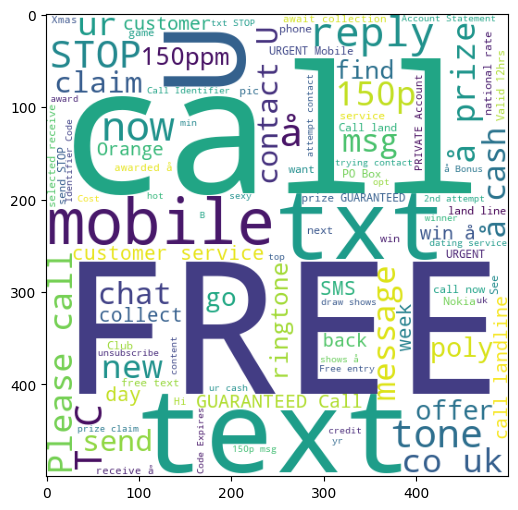

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

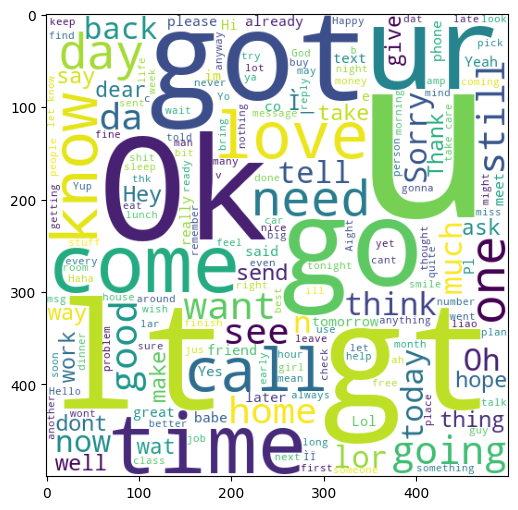

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [60]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [61]:
len(spam_corpus)

11075

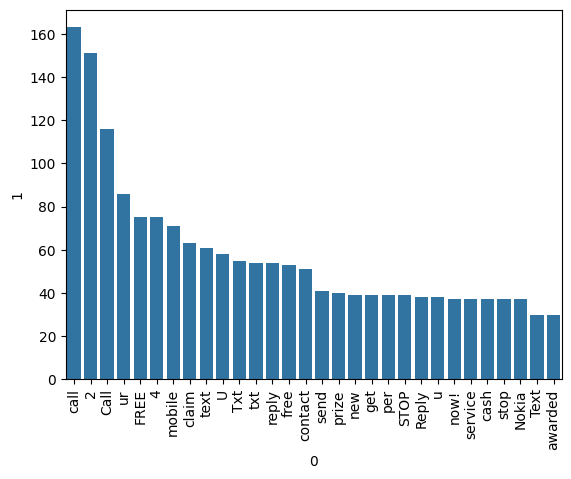

In [62]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of words
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Adjust the code to use keyword arguments
sns.barplot(x=most_common_words[0], y=most_common_words[1])
plt.xticks(rotation='vertical')
plt.show()


In [63]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

38351

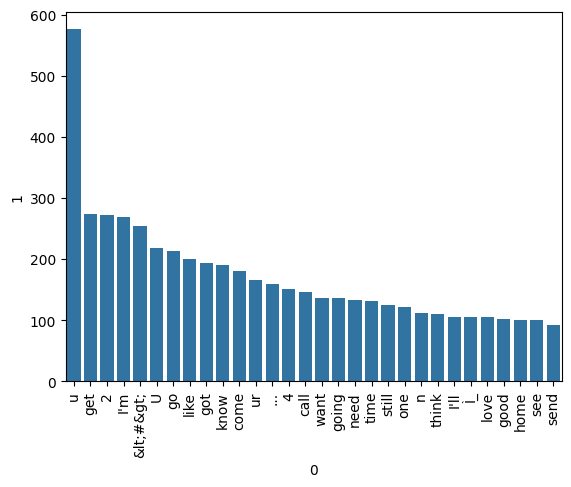

In [65]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of words
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Adjust the code to use keyword arguments
sns.barplot(x=most_common_words[0], y=most_common_words[1])
plt.xticks(rotation='vertical')
plt.show()


In [66]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


## 4. Model Building

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [70]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [71]:
X.shape

(5169, 3000)

In [72]:
y = df['target'].values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8994197292069632
[[811  85]
 [ 19 119]]
0.5833333333333334


In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[895   1]
 [ 22 116]]
0.9914529914529915


In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[896   0]
 [ 14 124]]
1.0


In [80]:
# tfidf --> MNB

In [81]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
from xgboost import XGBClassifier

In [84]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier  # Make sure this line is included

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, np.float64(0.967479674796748))

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  KN
Accuracy -  0.9032882011605415
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8846153846153846
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9494949494949495
For  RF
Accuracy -  0.9758220502901354
Precision -  1.0


C:\Users\aleen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.956140350877193
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.875
For  ETC
Accuracy -  0.9816247582205029
Precision -  1.0
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9587628865979382
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771


In [90]:
from sklearn.metrics import accuracy_score, precision_score

# Define your classifiers
clfs = {
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', n_estimators=50, random_state=2),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'XGB': XGBClassifier(n_estimators=50, random_state=2)
}

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Change average parameter as needed
    return accuracy, precision

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9738986042380552
For  KNN
Accuracy -  0.9032882011605415
Precision -  0.9129982211243427
For  NB
Accuracy -  0.8994197292069632
Precision -  0.9245543100836615
For  DT
Accuracy -  0.960348162475822
Precision -  0.960229618926284
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9633855223792885
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9752820576375765
For  AdaBoost
Accuracy -  0.9332688588007737
Precision -  0.9317393700646739
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.98200632061811
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9528803950779505
For  XGB
Accuracy -  0.9729206963249516
Precision -  0.9731694470386715


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.981625,0.982006
5,RF,0.974855,0.975282
0,SVC,0.973888,0.973899
9,XGB,0.972921,0.973169
4,LR,0.962282,0.963386
3,DT,0.960348,0.960230
8,GBDT,0.952611,0.952880
6,AdaBoost,0.933269,0.931739
2,NB,0.899420,0.924554
1,KNN,0.903288,0.912998


In [93]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [94]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.981625
1,RF,Accuracy,0.974855
2,SVC,Accuracy,0.973888
3,XGB,Accuracy,0.972921
4,LR,Accuracy,0.962282
5,DT,Accuracy,0.960348
6,GBDT,Accuracy,0.952611
7,AdaBoost,Accuracy,0.933269
8,NB,Accuracy,0.899420
9,KNN,Accuracy,0.903288


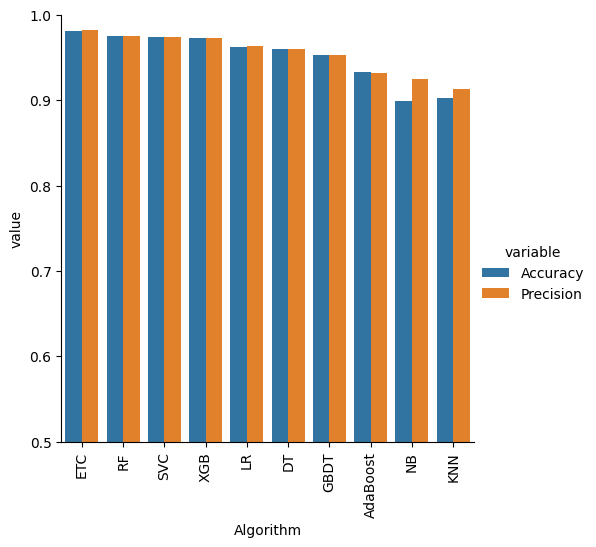

In [95]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [99]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [100]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [101]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [102]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.981625,0.982006,0.981625,0.982006,0.981625,0.982006,0.981625,0.982006
1,RF,0.974855,0.975282,0.974855,0.975282,0.974855,0.975282,0.974855,0.975282
2,SVC,0.973888,0.973899,0.973888,0.973899,0.973888,0.973899,0.973888,0.973899
3,XGB,0.972921,0.973169,0.972921,0.973169,0.972921,0.973169,0.972921,0.973169
4,LR,0.962282,0.963386,0.962282,0.963386,0.962282,0.963386,0.962282,0.963386
5,DT,0.960348,0.960230,0.960348,0.960230,0.960348,0.960230,0.960348,0.960230
6,GBDT,0.952611,0.952880,0.952611,0.952880,0.952611,0.952880,0.952611,0.952880
7,AdaBoost,0.933269,0.931739,0.933269,0.931739,0.933269,0.931739,0.933269,0.931739
8,NB,0.899420,0.924554,0.899420,0.924554,0.899420,0.924554,0.899420,0.924554
9,KNN,0.903288,0.912998,0.903288,0.912998,0.903288,0.912998,0.903288,0.912998


In [103]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [104]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [105]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [106]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.984


In [107]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [108]:
from sklearn.ensemble import StackingClassifier

In [109]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [110]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874274661508704
Precision 0.9770992366412213


In [111]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))